# Seaborn

* matplotlib의 상위 호환 데이터 시각화를 위한 라이브러리
* matplotlib를 기반으로 하는 다양한 색상 테마 제공
* matplotlib에서보다 통계와 관련된 다양한 차트 제공 -> 데이터 분석에 활발히 사용
* 기본적인 시각화 기능은 matplotlib에 depend
* 기본적인 통계 기능은 Statsmodels에 depend
* [seaborn package Gallery](https://seaborn.pydata.org/tutorial.html)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

## Figure-level vs. axes-level function

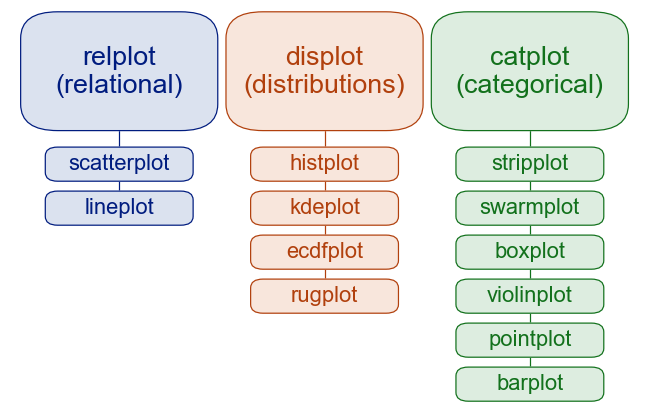

구분 | 종류 | Figure-level function | Axes-level function | Others 
:--- | :--- | :--- | :--- | :--- 
관계도 (relational plot) | 산점도 | `sns.relplot(kind="scatter")` | `sns.scatterplot()` | default
     | 선그림 | `sns.relplot(kind="line")` | `sns.lineplot()` | 
분포도 (distribution plot) | 히스토그램 | `sns.displot(kind="hist")` | `sns.histplot()` | default
  | 밀도그림 | `sns.displot(kind="kde")` | `sns.kdeplot()` |  
  | 누적분포그림 | `sns.displot(kind="ecdf")` | `sns.ecdfplot()` | 
  | 눈금그림 |  | `sns.rugplot()` | 밀도그림, 산점도 등의 하단에 추가되는 marginal plot
  | 분포도 | `sns.distplot()` | | 일변량 자료의 히스토그램, 밀도그림, rugplot 작성 시 사용되었으나, 곧 삭제 예정
범주형 산점도 (categorical scatterplot) | 점도표 (지터형식) | `sns.catplot(kind="strip")` | `sns.stripplot()` | default
 | 점도표 (no overlay) | `sns.catplot(kind="swarm") | `sns.swarmplot()` |  
범주형 분포도 (categorical distributiona plot) | 상자그림 | `sns.catplot(kind="box")` | `sns.boxplot()` | 
 | 바이올린그림 | `sns.catplot(kind="violin")` | `sns.violinplot()` | 
 | 문자값 그림 (letter value plot) | `sns.catplot(kind="boxen")` | `sns.boxenplot()` | 4분위수만이 아니라, 8, 16, 64, 128분위수를 이용, 빅데이터에 적용
범주형 추정그림 (categorical estimate plots) | 점추정그림 | `sns.catplot(kind="point")` | `sns.pointplot()` | 점추정치와 신뢰구간을 산점도 형식으로 표현
 | 평균막대그림 | `sns.catplot(kind="bar")` | `sns.barplot()` | 점추정치와 신뢰구간을 막대 형식으로 표현
  | 빈도막대그림 | `sns.catplot(kind="count")` | `sns.countplot()` | 빈도를 막대로 표현
회귀도표 (regression plot) | 회귀선과 산점도 |  -  | `sns.regplot()` | 데이터와 선형회귀선 도표
    | 다중회귀도표 | `sns.lmplot()` | - | `regplot()`과 `FacetGrid`의 결합
    | 잔차도표 | - | `sns.residplot()` | 
행렬도표 (matrix plot) | 히트맵 | - | `sns.heatmap()` | 
 | 덴드로그램과 히트맵 | - | `sns.clustermap()` |
다중도표 (multi-plot grids) | 그리드세팅 | `sns.FacetGrid()` | 한 데이터프레임의 변수들을 이용하여 다중도표 figure를 세팅
 | 다변수 그림 | `sns.pairplot()` | 한 데이터의 여러 변수를 이용하여 다중도표 작성
 | 다변수 그리드 세팅 | `sns.PairGrid()` | 한 데이터의 여러 변수를 이용하여 다중도표 figure를 세팅
 | 이변수 그림 | `sns.jointplot()` | 한 데이이터의 두 개 변수를 이용하여 그림 작성
 | 이변수 그리드 세팅 | `sns.JointGrid()` | 한 데이터의 두 개 변수를 이용하여 그림 figure를 세팅

 


## Style

* `sns.set_style()` : 그림의 전반적인 모양을 지정
* `sns.set_theme(style="")` : 위와 동일
* seaborn의 경우 5가지 기본 테마 제공 : ["white"(default), "dark", "whitegrid", "darkgrid", "ticks"]

In [ ]:
x = ["A", "B", "C"]
y = [1, 3, 2]

plt.figure(figsize=(25, 5))
sns.set_theme(style="white")
plt.subplot(151)#1,5,1
sns.barplot(x, y)
plt.title("white")

sns.set_theme(style="dark")
plt.subplot(152)
sns.barplot(x, y)
plt.title("dark")

sns.set_theme(style="whitegrid")
plt.subplot(153)
sns.barplot(x, y)
plt.title("whitegrid")

sns.set_theme(style="darkgrid")
plt.subplot(154)
sns.barplot(x, y)
plt.title("darkgrid")

sns.set_theme(style="ticks")
plt.subplot(155)
sns.barplot(x, y)
plt.title("ticks");

* Warning message 삭제하기
    * 파이썬은 가까운 미래에 지원하지 않거나 변경되는 기능에 대하여 위와 같은 경고메세지를 출력함
    * 경고성 메시지를 없애려면 warnings 모듈을 적

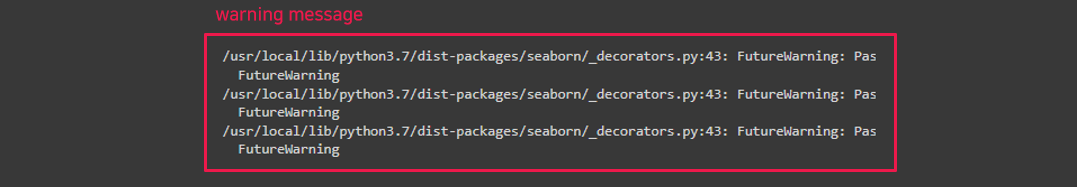

In [ ]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [ ]:
sns.set_style('darkgrid')

# 관계도

* Relational plot
* 통계적 관계들을 시각화하는 Figure-level에 속하는 클래스
* `sns.FacetGrid()`와 함께 axes-level에 대한 그림을 그리기 용이


구분 | 종류 | Figure-level function | Axes-level function | Others 
:--- | :--- | :--- | :--- | :--- 
관계도 (relational plot) | 산점도 | `sns.relplot(kind="scatter")` | `sns.scatterplot()` | default
     | 선그림 | `sns.relplot(kind="line")` | `sns.lineplot()` | 

## 산점도

* `sns.relplot(kind="scatter")`
* `sns.scatterplot(x, y, data, hue, style, size, sizes)`
    * `hue` : 특성을 구분할 컬럼 지정 (색으로 구분)
    * `style` : 특성을 구분할 컬럼 지정 (모양으로 구분)
    * `size` : 마커의 크기를 지정할 수 있는 변수 설정 / 연속형 범주형 모두 가능
    * `sizes` : size의 최소, 최대를 지정

* `hue`, `style`, `size`를 한꺼번에 지정하면 복잡도가 높아짐
* 변수간 연관성을 알아보는 것이 오히려 어려움

In [ ]:
# tips 데이터
# 손님들의 식사비용(total_bill), 팁(tip), 성별(sex), 흡연유무(smoker), 요일(day), 시간(time), 인원수(size)
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
# relplot의 default는 "scatter"
sns.relplot(x='total_bill',y='tip',data=tips,kind='scatter');

In [ ]:
# hue를 이용하여 그룹별 색상을 달리하여 표현 가능
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='smoker');

In [ ]:
sns.relplot(x='total_bill',y='tip',data=tips,hue='smoker',kind='scatter');

In [ ]:
# style을 이용하면 그룹별 모양도 달리할 수 있음
sns.relplot(x='total_bill',y='tip',data=tips,hue='smoker',kind='scatter',style='smoker');

In [ ]:
# smoker로 색상 구분, time으로 모양 구분하기
sns.relplot(x='total_bill',y='tip',data=tips,hue='smoker',kind='scatter',style='time');

In [ ]:
# 마커의 크기를 인원수에 따라 조정하기
sns.relplot(x='total_bill',y='tip',data=tips,size='size');

In [ ]:
# 마커의 크기에 대한 범위 지정해주기
sns.relplot(x='total_bill',y='tip',data=tips,size='size',sizes=(15,200));
#hue:color,stype:shape,size=size

## 다중그림 그리기

* `col` : 열기준 다중도표를 그릴 기준 컬럼 지정
* `col_wrap` : 한 행에 표기할 컬럼의 갯수 지정
* `row` : 행기준 다중도표를 그릴 기준 컬럼 지정
* `row_wrap` : 한 열에 표기할 행의 개수 지정


In [ ]:
# tips에서 시간대별 총금액 대비 팁 액수 산점도
sns.relplot(x='total_bill',y='tip',data=tips,hue='time');

In [ ]:
# 성별에 따라 점모양 달리해서 그려보기
sns.relplot(x='total_bill',y='tip',data=tips,hue='time',style='sex');

In [ ]:
# 성별에 따라 그림을 분리해서 그려보기 (2열로 그리기)
sns.relplot(x='total_bill',y='tip',data=tips,hue='time',col='sex');

In [ ]:
# 성별에 따라 그림을 분리해서 그려보기 (2행으로 그리기)
sns.relplot(x='total_bill',y='tip',data=tips,hue='time',row='sex');

In [ ]:
# 요일에 따라 나눠 그려보기
tips.day.value_counts()
sns.relplot(x='total_bill',y='tip',data=tips,hue='time',col='day');

In [ ]:
# 요일에 따라 나눠 그려보기 (단 한 줄에 2개씩 넣고 싶다)
sns.relplot(x='total_bill',y='tip',data=tips,hue='time',col='day',col_wrap=2);

In [ ]:
# 크기 조절 (높이=height, 너비=aspect)
sns.relplot(x='total_bill',y='tip',data=tips,hue='time',col='day',col_wrap=2,height=3,aspect=1.3);

## 선도표

* `sns.relplot(kind="line")`
* `sns.lineplot(x, y, data, hue, style, size, sizes, hue_order, style_order, size_order, estimator, ci, sort)`
    * `order` : 특성 구분 시 순서 결정
    * `estimator` : 동일한 x값에 대해 여러개의 y값이 있는 경우 통합추정치에 대한 통계량
    * `ci` : 동일한 x값에 대해 여러개의 y값이 있는 경우 통합추정치에 대한 신뢰구간
    * `sort` : x값을 오름차순으로 정렬 (default=True)

In [ ]:
# 자동으로 x값을 정렬하여 그림 도표
sns.lineplot(x='total_bill',y='tip',data=tips);

In [ ]:
# 정렬하지 않을 경우 
sns.lineplot(x='total_bill',y='tip',data=tips,sort=False);

In [ ]:
# flight 데이터 / 연월대비 승객수
flights = sns.load_dataset('flights')
flights.head()

In [ ]:
# x값이 동일한 데이터가 여러개인 경우 aggregation해서 평균으로 그리고 신뢰구간 도표함
sns.relplot(kind='line',x='year',y='passengers',data=flights);

In [ ]:
# 추정치를 중앙값으로 변경하고 신뢰구간은 표기하지 않을 경우
sns.relplot(kind='line',x='year',y='passengers',data=flights,estimator=np.median,ci=None);

In [ ]:
# 추정치를 최소값으로 하고 싶은 경우
sns.relplot(kind='line',x='year',y='passengers',data=flights,estimator=np.min,ci=None);

In [ ]:
# 추정치를 평균으로 하고 ci를 sd로 하고 싶은 경우
sns.relplot(kind='line',x='year',y='passengers',data=flights,estimator=np.mean,ci='sd');

In [ ]:
# 월별로 연도별 승객수를 따로 그려보고 싶은 경우
sns.relplot(kind='line',x='year',y='passengers',data=flights,hue='month');

In [ ]:
# 데이터 중 1월과 8월만 그리고 싶은 경우 
sns.relplot(kind='line',x='year',y='passengers',data=flights.query('month=="Jan" | month=="Aug"'),hue='month',hue_order=["Jan","Aug"]);

In [ ]:
sns.relplot(kind='line',x='year',y='passengers',data=flights.query('month=="Jan" | month=="Aug"'),hue='month',hue_order=["Jan","Aug"],style='month',style_order=['Jan','Aug']);

In [ ]:
# 마커 추가
sns.relplot(kind='line',x='year',y='passengers',data=flights.query('month=="Jan" | month=="Aug"'),hue='month',hue_order=["Jan","Aug"],style='month',style_order=['Jan','Aug']
            ,markers=True);

In [ ]:
# 마커 추가
sns.relplot(kind='line',x='year',y='passengers',data=flights.query('month=="Jan" | month=="Aug"'),hue='month',hue_order=["Jan","Aug"],style='month',style_order=['Jan','Aug']
            ,markers=['^','v']);

In [ ]:
# 선두께 변경
sns.relplot(kind='line',x='year',y='passengers',data=flights.query('month=="Jan" | month=="Aug"'),hue='month',hue_order=["Jan","Aug"],style='month',style_order=['Jan','Aug']
            ,markers=['^','v'],size='month',size_order=['Jan','Aug']);

# 분포도

## 히스토그램

* `sns.displot(kind="hist")`
* `sns.histplot(x, y, data, binwidth, bins, stat, cumulative, multiple, element)`
    * `binwidth` : 빈 두께
    * `bins` : 빈 개수
    * `stat` : 통계량 ["count" (default), "probability", "percent", "density")
    * `cumulative` : True이면 누적
    * `multiple` : 특성별 그릴 경우 "layer", "dodge", "stack", "fill" 중 선택 가능
    * `element` : 막대모양 "bars", "step", "poly"
    

In [ ]:
# 펭귄 데이터 가져오기
penguins = sns.load_dataset('penguins')
penguins.head()

In [ ]:
# 지느러미 길이로 히스토그램 작성
sns.displot(kind='hist',x='flipper_length_mm',data=penguins)

In [ ]:
# 가로로 히스토그램 그리기
sns.histplot(y='flipper_length_mm',data=penguins)

In [ ]:
# 빈도 대신 밀도로 보여주기
sns.histplot(y='flipper_length_mm',data=penguins,stat='density')

In [ ]:
# 누적하기
sns.histplot(x='flipper_length_mm',data=penguins,cumulative=True)

In [ ]:
# bin 너비 지정
sns.histplot(x='flipper_length_mm',data=penguins,binwidth=10)

In [ ]:
# bin 개수 지정
sns.histplot(x='flipper_length_mm',data=penguins,bins=30)

In [ ]:
# 밀도추정선 추가
sns.histplot(x='flipper_length_mm',data=penguins,kde=True)

In [ ]:
# 종별로 색상 달리 하되, 간격을 줄여서 떨어뜨리기
sns.histplot(x='flipper_length_mm',data=penguins,hue='species',multiple='dodge')

In [ ]:
# 종별로 색상 달리하되, 누적하기
sns.histplot(x='flipper_length_mm',data=penguins,hue='species',multiple='stack')

In [ ]:
# 종별로 색상 달리하되, 도수분포다각형으로 그리고, 투명도 조정하기
sns.histplot(x='flipper_length_mm',data=penguins,hue='species',element='poly',alpha=0.5)

## 밀도그림

* `sns.displot(kind="kde")`
* `sns.kdeplot(x, y, data, bw_adjust)`
    * `bw_adjust` : 밀도 추정시 추정할 데이터의 간격 조정

In [ ]:
# tips 데이터에서 팁 금액에 대한 밀도추정그림 그리기
sns.kdeplot(x='tip',data=tips)

In [ ]:
# 가로로 그리기
sns.kdeplot(y='tip',data=tips)

In [ ]:
# 여러개를 한꺼번에 그리기
sns.kdeplot(data=tips[['total_bill','tip']])

In [ ]:
# 밀도 추정시 추정한 데이터의 간격 조정
sns.kdeplot(x='tip',data=tips,bw_adjust=.2)

In [ ]:
# 시간대에 따라 색을 달리하여 추정하기
sns.kdeplot(x='tip',data=tips,hue='time')

In [ ]:
# 시간대에 따라 색을 달리하여 추정하기 (색채우기)
sns.kdeplot(x='tip',data=tips,hue='time',fill=True)

In [ ]:
# 색상 지정하기
sns.kdeplot(x='tip',data=tips,hue='time',fill=True,palette='crest')

In [ ]:
# 시간대에 따라 누적하기
sns.kdeplot(x='tip',data=tips,hue='time',multiple='stack')

* seaborn에서 제공하는 컬러 팔레트 이용하기
    * ["컬러팔레트 설명"](https://seaborn.pydata.org/tutorial/color_palettes.html)
    * 예시: `sns.color_palette("tab10")`

In [ ]:
# 시간대에 따라 누적하기 (색상팔레트 이용하기)
sns.kdeplot(x='tip',data=tips,hue='time',fill=True,multiple='stack',palette='tab10')

In [ ]:
# 시간대에 따라 누적하기 (색상팔레트 이용하기)
sns.kdeplot(x='tip',data=tips,hue='time',fill=True,multiple='stack',palette='Set2')

In [ ]:
# 시간대에 따라 누적하기 (색상팔레트 이용하기)
sns.kdeplot(x='tip',data=tips,hue='time',fill=True,multiple='stack',palette=sns.color_palette('Set2',2))

In [ ]:
# 시간대에 따라 채우기 (색상팔레트 이용하기)
sns.kdeplot(x='tip',data=tips,hue='time',fill=True,multiple='fill',palette='Set2')

In [ ]:
# 누적하기
sns.kdeplot(x='tip',data=tips,palette='Set2',cumulative=True,fill=True)

In [ ]:
# rug 생성
sns.kdeplot(x='tip',data=tips,palette='Set2',cumulative=True,fill=True)
sns.rugplot(x='tip',data=tips)

In [ ]:
# 산점도에 러그 깔기
sns.scatterplot(x='total_bill',y='tip',data=tips)
sns.rugplot(x='total_bill',y='tip',data=tips)

# 범주형 도표

## 점도표

* 점으로 히스토그램 또는 막대그림 그리기 (지터형식)
    * `sns.catplot(kind="strip")`
    * `sns.stripplot()`

* 점으로 히스토그램 또는 막대그림 그리기 (겹치지 않게)
    * `sns.catplot(kind="swarm")`
    * `sns.swarmplot()`



In [ ]:
# 팁금액을 점도표로 그려보기 (strip)
sns.catplot(kind='strip',x='tip',data=tips)

In [ ]:
# 팁금액을 점도표로 그려보기 (swarm)
sns.catplot(kind='swarm',x='tip',data=tips)

In [ ]:
# 요일별로 팁 금액 점도표 그리기
sns.swarmplot(x='day',y='tip',data=tips)

In [ ]:
# 요일별로 팁 금액 점도표 그리기
sns.stripplot(x='day',y='tip',data=tips)

In [ ]:
# 지터를 축소해보기
sns.stripplot(x='day',y='tip',data=tips,jitter=0.05)

In [ ]:
# 가로로 눕혀보기
sns.stripplot(y='day',x='tip',data=tips)

In [ ]:
# 점의 바깥 선 두께를 변경해보기
sns.stripplot(x='day',y='tip',data=tips,linewidth=1)

In [ ]:
# 성별에 따라 색상 달리 하기
sns.stripplot(x='day',y='tip',data=tips,hue='sex')

In [ ]:
# 성별에 따라 색상 달리하고 떨어뜨려서 그리기
sns.stripplot(x='day',y='tip',data=tips,hue='sex',dodge=True)

In [ ]:
# 여자 먼저 그려지게 하기
sns.stripplot(x='day',y='tip',data=tips,hue='sex',dodge=True,hue_order=['Female','Male'])

In [ ]:
# 점모양과 사이즈 바꾸기
sns.stripplot(x='day',y='tip',data=tips,hue='sex',marker='D',size=8)

In [ ]:
# 투명도 주고 바깥 라인색을 회색으로 지정
sns.stripplot(x='day',y='tip',data=tips,hue='sex',marker='D',size=8,alpha=0.25,edgecolor='gray')

## 박스그림

* `sns.catplot(kind="box")`
* `sns.boxplot(x, y, data)`

In [ ]:
# 팁 금액에 대한 박스그림 그리고 tip(won)이라는 축이름 넣기
sns.boxplot(x='tip',data=tips)
plt.xlabel('tip (won)')

In [ ]:
# 가로로 그리기
sns.boxplot(y='tip',data=tips)

In [ ]:
# 요일별 팁금액 박스그림 그리기
sns.boxplot(x='day',y='tip',data=tips,)

In [ ]:
# 성별에 따라 나눠서 그리기
sns.boxplot(x='day',y='tip',data=tips,hue='sex',width=0.5)

In [ ]:
# 박스 너비 조율하기 (0.8이 디폴트)
sns.boxplot(x='day',y='tip',data=tips,hue='sex',linewidth=3)

In [ ]:
# 라인 두께 조정하기


In [ ]:
# jitter plot 얹기
sns.boxplot(x='day',y='tip',data=tips,)
sns.stripplot(x='day',y='tip',data=tips,color='k',marker='D')

In [ ]:
# 성별 및 흡연여부에 따라 팁금액의 박스를 따로 그리고, 이것을 시간대에 따라 나눠 그리기
sns.catplot(kind='box',x='sex',y='tip',data=tips,hue='smoker',col='time')

## 바이올린그림

* `sns.catplot(kind="violin")`
* `sns.violinplot(x, y, data)`

In [ ]:
# 팁금액으로 바이올린 플롯 그리기
sns.violinplot(x='tip',data=tips);

In [ ]:
# 요일별 팁금액 
sns.violinplot(x='day',y='tip',data=tips)

In [ ]:
# 성별에 따라 따로 그리기
sns.violinplot(x='day',y='tip',data=tips,hue='sex')

In [ ]:
# 성별에 따라 나눠 그리되, 반반 그리기
sns.violinplot(x='day',y='tip',data=tips,hue='sex',split=True)

In [ ]:
# 일요일이 먼저 오게 그리기
sns.violinplot(x='day',y='tip',data=tips,order=['Sun','Thur','Fri','Sat'])

In [ ]:
# 안 쪽에 퀀타일 라인 표기 하기
sns.violinplot(x='day',y='tip',data=tips,inner='quartile')

In [ ]:
# 안 쪽에 각 관측치 라인 표기 하기
sns.violinplot(x='day',y='tip',data=tips,inner='stick')

In [ ]:
# 라인 추정 시 빈 너비 지정하기 (bw="scott", "silverman", 또는 숫자)
sns.violinplot(x='day',y='tip',data=tips,bw=.2)

## 점추정그림

* `sns.catplot(kind="point")`
* `sns.pointplot(x, y, data)`

In [ ]:
# 요일별 팁금액에 대한 점도표 그려보기
sns.catplot(kind='strip',x='day',y='tip',data=tips)

In [ ]:
# 각 요일에 대한 평균 추정치로 그리기
sns.catplot(kind='point',x='day',y='tip',data=tips)

In [ ]:
# 선 제외하기
sns.catplot(kind='point',x='day',y='tip',data=tips,join=False)

In [ ]:
# 중앙값으로 그리기
sns.catplot(kind='point',x='day',y='tip',data=tips,estimator=np.median)

In [ ]:
# 에러막대 지우기
sns.catplot(kind='point',x='day',y='tip',data=tips,ci=None)

In [ ]:
# 에러막대 표준편차로 바꾸기
sns.catplot(kind='point',x='day',y='tip',data=tips,ci='sd')

In [ ]:
# 에러막대 90% 신뢰구간으로 바꾸기


In [ ]:
# 에러막대에 캡 씌우기
sns.catplot(kind='point',x='day',y='tip',data=tips,ci='sd',capsize=.2)

In [ ]:
# 성별에 따라 따로 그리기
sns.catplot(kind='point',x='day',y='tip',data=tips,hue='sex')

In [ ]:
# 성별에 따라 따로 그리기
sns.catplot(kind='point',x='day',y='tip',data=tips,col='sex')

## 평균막대그림

* `sns.catplot(kind="bar")`
* `sns.barplot(x, y, data)`

In [ ]:
# 요일에 다른 팁 금액에 대한 평균 막대 그림
sns.barplot(x='day',y='tip',data=tips)

In [ ]:
# 가로로 그리기


In [ ]:
# 요일에 다른 팁 금액을 시간대로 나누어서 그리기
sns.barplot(x='day',y='tip',data=tips,hue='time')

In [ ]:
# 범례를 밖으로 빼기 (catplot 단위에서 수행)
sns.catplot(kind='bar',x='day',y='tip',data=tips,hue='time',legend_out=True)

In [ ]:
# 추정치를 중앙값으로, 막대를 표준편차로, 캡 씌우기
sns.barplot(x='day',y='tip',data=tips,estimator=np.median,ci='sd',capsize=.2)

In [ ]:
# 막대 반만 그리기 (zorder로 그리는 순서 변경)
sns.barplot(x='day',y='tip',data=tips,estimator=np.median,ci='sd',capsize=.2,zorder=100)

## 빈도막대그림

* `sns.catplot(kind="count")`
* `sns.countplot(x, y, data)`

In [ ]:
# 요일별 방문자수에 대한 막대그림
sns.countplot(x='day',data=tips)

In [ ]:
# 요일별 성별에 따라 방문자수에 대한 막대그림을 따로 그리기
sns.countplot(x='day',data=tips,hue='sex')

In [ ]:
# 가로로 그리기


In [ ]:
# 시간대별로 나눠 그리기
sns.catplot(kind='count',x='day',data=tips,hue='sex',col='time')

# 회귀도표


## 회귀선과 산점도

* `sns.regplot(x, y, data)`

In [ ]:
# 식사비용 대비 팁에 대한 산점도와 회귀직선 그리기
sns.regplot(x='total_bill',y='tip',data=tips)

In [ ]:
# 점모양과 컬러변경 (팔레트 적용 불가)
sns.regplot(x='total_bill',y='tip',data=tips,color='g',marker='+')

In [ ]:
# 신뢰구간 제외하기
sns.regplot(x='total_bill',y='tip',data=tips,ci=None)

In [ ]:
# 90% 신뢰구간 
sns.regplot(x='total_bill',y='tip',data=tips,ci=90)

In [ ]:
# 인원수에 따라서 팁비용 그리기
sns.regplot(x='size',y='tip',data=tips)

In [ ]:
# 인원수에 따라서 팁비용 그리기 (지터주기)
sns.regplot(x='size',y='tip',data=tips,x_jitter=.1)

In [ ]:
# 평균 막대로 그리기
sns.regplot(x='size',y='tip',data=tips,x_estimator=np.mean)

In [ ]:
# 2차곡선 적합
sns.regplot(x='size',y='tip',data=tips,order=2)

## 다중회귀도표

* `sns.lmplot()` : `sns.regplot()` + `sns.FacetGrid()`

In [ ]:
# sns.regplot(x="total_bill", y="tip", data=tips, hue="sex");
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

In [ ]:
# 팔레트 색상 지정
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='Set2')

In [ ]:
# 요일별로 나눠 그리기 (aspect로 너비 조정)
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',col='day',aspect=.6)

In [ ]:
# 요일별로 나눠 그리기 (2x2 되게 그리기)
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',col='day',aspect=.6,col_wrap=2)

## 잔차도표

* `sns.residplot()`

In [ ]:
# 사용금액 대비 팁금액에 대한 잔차도표 그리기
sns.residplot(x='total_bill',y='tip',data=tips)

# 다중도표

## FacetGrid()

* `sns.FacetGrid(data, row, col)`
* `sns.map_dataframe(plotname, x, y)`

In [ ]:
# 시간대에 따라 facet을 나누고 사용금액과 팁에 대한 그림 그리기
sns.relplot(x='total_bill',y='tip',data=tips,col='time')

In [ ]:
# 행은 성별, 열은 시간으로 facet을 나누고 팁에 대한 히스토그램 그리기
f = sns.FacetGrid(tips,col='time')
f.map_dataframe(sns.scatterplot,x='total_bill',y='tip')

In [ ]:
# 요일별로 facet을 나누고, 성별에 따라 색을 달리하여 사용금액과 팁에 대한 히스토그램 그리기
f = sns.FacetGrid(tips,row='sex',col='time')
f.map_dataframe(sns.histplot,x='tip')

In [ ]:
# 한 행에 2개씩 그리고 너비 조정하기
f = sns.FacetGrid(tips,hue='sex',col='day',col_wrap=2,aspect=2,height=4)
f.map_dataframe(sns.scatterplot,x='total_bill',y='tip')
f.add_legend()

## pairplot()

* 연속형 변수에 대한 jointplot을 그려줌
* `sns.pairplot(data)`

In [ ]:
# 펭귄 데이터 다시 보기
penguins.head()

In [ ]:
# 펭귄 데이터로 pairplot 그려보기
sns.pairplot(penguins)

In [ ]:
# 종별로 색을 달리하여 그리기
sns.pairplot(penguins,hue='species')

In [ ]:
# 대각원소를 히스토그램으로 변경하기
sns.pairplot(penguins,hue='species',diag_kind='hist')

In [ ]:
# 하삼각만 그리기
sns.pairplot(penguins,hue='species',corner=True)

## jointplot()

* `sns.jointplot(x, y, data)`

In [ ]:
# 사용금액 대비 팁금액에 대한 jointplot 그려보기
sns.jointplot(x='total_bill',y='tip',data=tips)

In [ ]:
# 성별로 색상 따로 그리기
sns.jointplot(x='total_bill',y='tip',data=tips,hue='sex')

In [ ]:
# 산점도 대신 밀도추정그림으로 그리기
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

In [ ]:
# 산점도 대신 히스토그램으로 그리기
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hist')

In [ ]:
# 산점도 대신 회귀선으로 그리기
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

In [ ]:
# margin plot의 높이 조정하기
sns.jointplot(x='total_bill',y='tip',data=tips,ratio=2)

# Colab에서 한글폰트 그래프 작성

 - 그래프에 한글 들어가는 경우 아래 과정 필요
    - 코랩 서버에 나눔 글꼴 설치
    - 필요한 패키지 호출
    - 시스템 폰트에 나눔 글꼴 설치되었는지 확인
    - 런타임 재시작
    - `matplotlib.font_manager._rebuild()` 실행
    - `plt.rc('font', family='NanumGothic')` 실행하여 NanumGothic으로 글꼴 설정
    - `mpl.rcParams['axes.unicode_minus'] = False` 실행하여 마이너스 기호 출력되도록 설정
    


In [ ]:
import matplotlib.font_manager as fm

In [ ]:
fm.findSystemFonts()